<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/timeseries/ml/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


#### Download dataset

In [ ]:
import kagglehub

path = kagglehub.dataset_download("abhisheksjha/time-series-air-quality-data-of-india-2010-2023")
print("Path to dataset files:", path)

100%|██████████| 464M/464M [00:05<00:00, 95.7MB/s]

Extracting files...


In [ ]:
path += "/AP001.csv"

In [ ]:
aq_dataset = pd.read_csv(path, parse_dates=["From Date", "To Date"], index_col='From Date')

In [ ]:
aq_dataset.head()

In [ ]:
aq_dataset.columns

In [ ]:
aq_dataset['Temp (degree C)'].ffill().plot(figsize=(15, 5))

##### Prepare features

In [ ]:
ts = aq_dataset['Temp (degree C)'].ffill()
df = pd.DataFrame(ts)

# Create lag features
for lag in [1, 2, 3, 7, 14]:
    df[f'lag_{lag}'] = df['Temp (degree C)'].shift(lag)

# Optional: add rolling statistics
df['roll7_mean'] = df['Temp (degree C)'].rolling(7).mean().shift(1)
df['roll7_std'] = df['Temp (degree C)'].rolling(7).std().shift(1)

df = df.dropna()


In [11]:
split_idx = int(len(df) * 0.8)
train, test = df.iloc[:split_idx], df.iloc[split_idx:]

X_train = train.drop(columns=['Temp (degree C)'])
y_train = train['Temp (degree C)']
X_test = test.drop(columns=['Temp (degree C)'])
y_test = test['Temp (degree C)']


In [27]:
model = DecisionTreeRegressor(max_depth=9, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

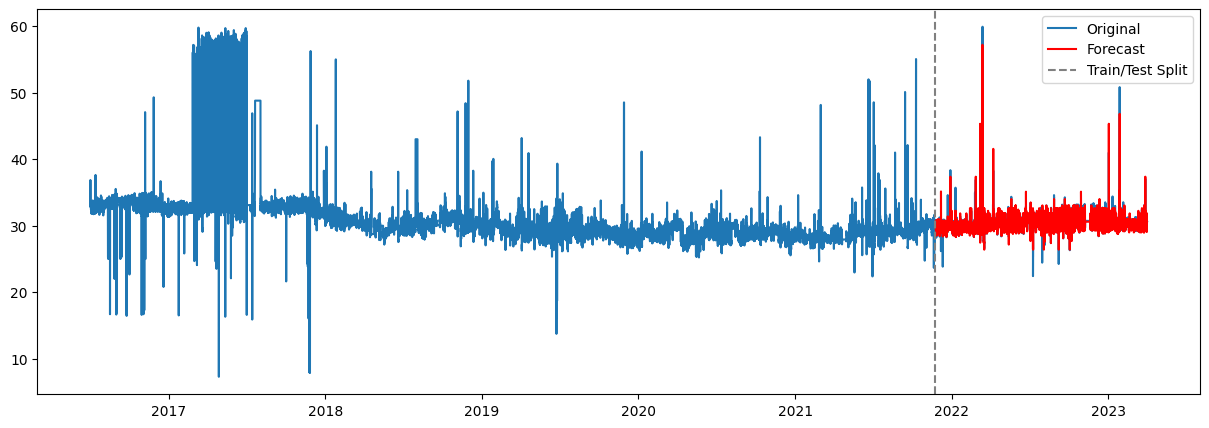

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(ts.index, ts.values, label='Original')
plt.plot(test.index, y_pred, label='Forecast', color='red')
plt.axvline(ts.index[split_idx], color='gray', linestyle='--', label='Train/Test Split')
plt.legend()
plt.show()


In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'MAPE (%)', 'R²'],
    'Value': [mae, mse, rmse, mape, r2]
})
print(metrics_df)


     Metric     Value
0       MAE  0.316462
1       MSE  1.138593
2      RMSE  1.067049
3  MAPE (%)  0.980597
4        R²  0.550578
